In [257]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [258]:
data = pd.read_excel('iris (1).xls')
data.shape

(150, 5)

In [259]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [260]:
data.shape

(150, 5)

In [261]:
#checking for any missing values

In [262]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

# preprocessing

In [263]:
data['SL'] = data['SL'].fillna(data['SL'].mean())
data['SW'] = data['SW'].fillna(data['SW'].mean())
data['PL'] = data['PL'].fillna(data['PL'].mean())

In [264]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [265]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [266]:
from sklearn.preprocessing import LabelEncoder
label_en = LabelEncoder()
a = ['Classification']
for i in np.arange(len(a)):
    data[a[i]] = label_en.fit_transform(data[a[i]])

In [267]:
data.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.855944,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0


Text(0.5, 1.0, 'Box plot of SW')

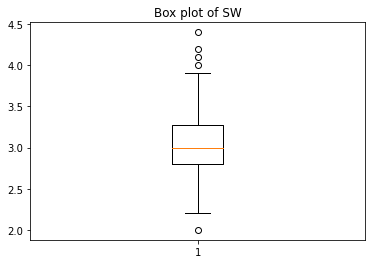

In [268]:
plt.boxplot(data['SW'])
plt.title('Box plot of SW')


In [269]:
#finding different quartile values of spirit service column
Q1 = np.percentile(data['SW'],25,interpolation='midpoint')
Q2 = np.percentile(data['SW'],50,interpolation='midpoint')
Q3 = np.percentile(data['SW'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [270]:
#to find interquartile range
IQR = Q3 - Q1
low_limit = Q1-1.5*IQR
up_limit = Q3+1.5*IQR
print(low_limit)
print(up_limit)

2.1249999999999996
3.9250000000000003


In [271]:
outlier = []
for x in data['SW']:
    if x < low_limit or x > up_limit:
        outlier.append(x)

In [272]:
print(outlier)

[4.0, 4.4, 4.1, 4.2, 2.0]


In [273]:
ind1 = data['SW']>up_limit
data.loc[ind1].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [274]:
data.drop([14, 15, 32, 33 ],inplace=True)

Text(0.5, 1.0, 'Box plot of SW')

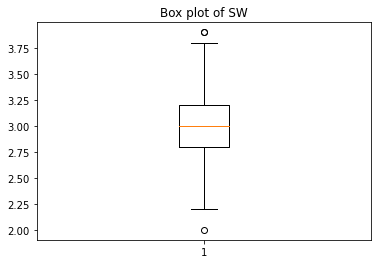

In [275]:
plt.boxplot(data['SW'])
plt.title('Box plot of SW')

In [276]:
data.shape

(146, 5)

In [277]:
x = data.drop(['Classification'],axis=1)
y = data['Classification']

In [278]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

# Logistic regression

In [279]:
from sklearn.linear_model import LogisticRegression

In [280]:
logit_model = LogisticRegression()

In [281]:
logit_model.fit(x_train,y_train)
y_pred = logit_model.predict(x_test)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [282]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [283]:
print('accuracy is: ',accuracy_score(y_test,y_pred))


accuracy is:  0.9333333333333333


In [284]:
confusion_matrix(y_test,y_pred)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]], dtype=int64)

# kNN model

In [285]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [286]:
acc_values

[0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9666666666666667,
 1.0,
 1.0]

Text(0, 0.5, 'acuracy')

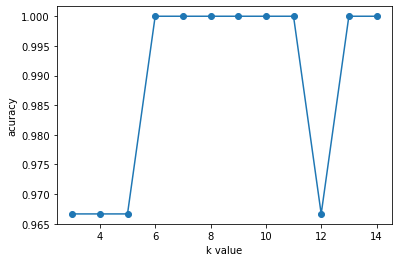

In [287]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('acuracy')

In [288]:
#taking k value as 8
classifier = KNeighborsClassifier(n_neighbors=8,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [289]:
print('accuracy is: ',accuracy_score(y_test,y_pred))


accuracy is:  1.0


In [290]:
confusion_matrix(y_test,y_pred)

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 10]], dtype=int64)

# SVM(support vector machine)
Linear SVM

In [291]:
from sklearn.svm import SVC

In [292]:
svm_linear = SVC(kernel='linear')

In [293]:
svm_linear.fit(x_train,y_train)

SVC(kernel='linear')

In [294]:
y_pred = svm_linear.predict(x_test)

In [295]:
print('Accuracy using linear SVM is ',accuracy_score(y_test,y_pred))

Accuracy using linear SVM is  0.9333333333333333


# Randomforest

In [314]:
x['mean']=x[['SL', 'SW']].mean(axis=1)
x['sum']=x[['PL', 'PW']].sum(axis=1)

In [315]:
x.columns

Index(['SL', 'SW', 'PL', 'PW', 'mean', 'sum'], dtype='object')

In [316]:
from sklearn.model_selection import train_test_split

In [317]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [318]:
from sklearn.ensemble import RandomForestClassifier

In [319]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [320]:
print('accuracy is: ',accuracy_score(y_test,y_pred))


accuracy is:  0.9333333333333333


In [321]:
confusion_matrix(y_test,y_pred)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]], dtype=int64)

In [322]:
pd.Series(rf.feature_importances_,index=x.columns).sort_values(ascending=False)*100

PW      32.104717
sum     29.165192
PL      24.081484
SL       9.420259
SW       2.785993
mean     2.442356
dtype: float64